# 프로젝트 : 얼굴을 인식하여 캐릭터 씌우기

## Face Detection(얼굴인지) vs Face Recognition(누구인지)

패키지 설치 : pip install mediapipe → 맥의경우 그냥 터미널에서 입력
- 패키지 설치 오류나는 경우 : pip install --user mediapipe

### 얼굴찾아서 각 부분에 동그라미

In [8]:
import cv2
import mediapipe as mp

# 얼굴을 찾고, 찾은 얼굴에 표시를 해주기 위한 변수 정의
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 face_detection 모듈을 사용
mp_drawing = mp.solutions.drawing_utils # 얼굴의 특징을 그리기 위한 drawing_utils 모듈을 사용

# 동영상 파일 열기
cap = cv2.VideoCapture('face_video.mp4')

# with문은 별도로 close 해줄 필요 없음
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.7) as face_detection:
    # model_selection : 0(2m이내 근거리에 적합) or 1 (5m이내 중거리에 적합)
    # min_detection_confidence : 어느정도면 얼굴로 인식할지(신뢰도), threshold개념
    while cap.isOpened():
        success, image = cap.read()
        if not success: # 가져올 프레임이 없는경우
            break # 반복문 끝내자

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # mediapipe는 RGB를 기준으로 하는듯
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.detections: # 검출된 얼굴이 있으면
            # 6개 특징(relative_keypoints) : 오른눈, 왼눈, 코끝, 입중심, 오른귀, 왼귀(귀구슬점)의 상대좌표(1을 기준으로 0.x)
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection) # 검출된 얼굴에 사각형, 6개지점(빨간점) 그리기
            
                # print(detection) # dection정보가 궁금하다면 print()로 찍어보자
                
                # 특정 위치 가져오기
                keypoints = detection.location_data.relative_keypoints # detection 클래스안의 클래스, 함수 호출 방법
                right_eye = keypoints[0] # 오른쪽 눈(의 상대좌표)
                left_eye = keypoints[1] # 왼쪽 눈(의 상대좌표)
                nose_tip = keypoints[2] # 코 끝
                 
                h, w, _ = image.shape # height, width, channel(안쓰겠다 → _) : 이미지로부터 세로, 가로크기 가져옴
                right_eye = (int(right_eye.x * w), int(right_eye.y * h)) # 이미지내 절대좌표를 튜플형태로
                left_eye = (int(left_eye.x * w), int(left_eye.y * h))
                nose_tip = (int(nose_tip.x * w), int(nose_tip.y * h))
                
                # 양눈에 동그라미 그리기
                cv2.circle(image, right_eye, 50, (255,0,0), 10, cv2.LINE_AA) # 파란색 동그라미
                cv2.circle(image, left_eye, 50, (0,255,0), 10, cv2.LINE_AA) # 초록색 동그라미
                # 코에 동그라미 그리기
                cv2.circle(image, nose_tip, 75, (0, 255, 255), 10, cv2.LINE_AA) # 노란색 동그라미
            
                
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.resize(image, None, fx=0.5, fy=0.5))
        
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 얼굴 찾아서 각 부분에 그림판 이미지 올리기

In [10]:
import cv2
import mediapipe as mp

# 얼굴을 찾고, 찾은 얼굴에 표시를 해주기 위한 변수 정의
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 face_detection 모듈을 사용
mp_drawing = mp.solutions.drawing_utils # 얼굴의 특징을 그리기 위한 drawing_utils 모듈을 사용

# 동영상 파일 열기
cap = cv2.VideoCapture('face_video.mp4')

# 이미지 불러오기
image_right_eye = cv2.imread('right_eye.png') # 100 X 100 : 가로 X 세로
image_left_eye = cv2.imread('left_eye.png') # 100 X 100
image_nose = cv2.imread('nose.png') # 300 X 100

# with문은 별도로 close 해줄 필요 없음
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.7) as face_detection:
    # model_selection : 0(2m이내 근거리에 적합) or 1 (5m이내 중거리에 적합)
    # min_detection_confidence : 어느정도면 얼굴로 인식할지(신뢰도), threshold개념
    while cap.isOpened():
        success, image = cap.read()
        if not success: # 가져올 프레임이 없는경우
            break # 반복문 끝내자

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # mediapipe는 RGB를 기준으로 하는듯
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.detections: # 검출된 얼굴이 있으면
            # 6개 특징(relative_keypoints) : 오른눈, 왼눈, 코끝, 입중심, 오른귀, 왼귀(귀구슬점)의 상대좌표(1을 기준으로 0.x)
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection) # 검출된 얼굴에 사각형, 6개지점(빨간점) 그리기
            
                # print(detection) # dection정보가 궁금하다면 print()로 찍어보자
                # 특정 위치 가져오기
                keypoints = detection.location_data.relative_keypoints
                right_eye = keypoints[0] # 오른쪽 눈(의 상대좌표)
                left_eye = keypoints[1] # 왼쪽 눈(의 상대좌표)
                nose_tip = keypoints[2] # 코 끝
                 
                h, w, _ = image.shape # height, width, channel(안쓰겠다 → _) : 이미지로부터 세로, 가로크기 가져옴
                right_eye = (int(right_eye.x * w), int(right_eye.y * h)) # 이미지내 절대좌표를 튜플형태로
                left_eye = (int(left_eye.x * w), int(left_eye.y * h))
                nose_tip = (int(nose_tip.x * w), int(nose_tip.y * h))
                
                # 양눈에 동그라미 그리기
                # cv2.circle(image, right_eye, 50, (255,0,0), 10, cv2.LINE_AA) # 파란색 동그라미
                # cv2.circle(image, left_eye, 50, (0,255,0), 10, cv2.LINE_AA) # 초록색 동그라미
                # 코에 동그라미 그리기
                # cv2.circle(image, nose_tip, 75, (0, 255, 255), 10, cv2.LINE_AA) # 노란색 동그라미
            
                # 각 특징에다가 이미지 그리기
                image[right_eye[1]-50:right_eye[1]+50, right_eye[0]-50:right_eye[0]+50] = image_right_eye
                image[left_eye[1]-50:left_eye[1]+50, left_eye[0]-50:left_eye[0]+50] = image_left_eye
                image[nose_tip[1]-50:nose_tip[1]+50, nose_tip[0]-150:nose_tip[0]+150] = image_nose
                
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.resize(image, None, fx=0.5, fy=0.5))
        
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
# BGR(3Channel) 이미지는 투명값이 없다
# BGRA(4Channel) 이미지는 투명값(A)을 가질수 있다

-1

In [11]:
image_right_eye = cv2.imread('right_eye.png')
image_right_eye.shape
# 그냥 읽어오면 4채널 이미지더라도 3채널 까지만 읽어옴

(100, 100, 3)

In [ ]:
image_right_eye = cv2.imread('right_eye.png', cv2.IMREAD_UNCHANGED)
image_right_eye.shape
# 4채널 이미지를 4채널 까지 읽어옴

### 투명영역이 있는 4채널 이미지를 3채널 이미지에 오버레이

In [ ]:
import cv2
import mediapipe as mp

# 투명영역이 있는 4채널 이미지를 3채널 이미지에 오버레이 하기 위한 함수
def overlay(image, x, y, w, h, overlay_image):
    alpha = overlay_image[:, :, 3] # 전체가로크기, 전체세로크기, BGRA중 3번 인덱스인 'A' 만 가져옴
    mask_image = alpha / 255 # 0~255를 255로 나누면 0~1 사이의 값 (1: 불투명, 0: 완전투명)
    # (255, 255) → (1, 1)
    # (255, 0)   → (1, 0)
    
    # 1 - mask_image?
    # (0, 0)
    # (0, 1)
    
    
    for c in range(0, 3): # Channel BGR
        image[y-h:y+h, x-w:x+w, c] = (overlay_image[:, :, c] * mask_image) + (image[y-h:y+h, x-w:x+w, c] * (1 - mask_image))
        # 완전 투명한 영역은 대상이미지에서 사용하고, 완전 불투명한영역은 오버레이에서 가져다 쓴다.
        
# 얼굴을 찾고, 찾은 얼굴에 표시를 해주기 위한 변수 정의
mp_face_detection = mp.solutions.face_detection # 얼굴 검출을 위한 face_detection 모듈을 사용
mp_drawing = mp.solutions.drawing_utils # 얼굴의 특징을 그리기 위한 drawing_utils 모듈을 사용

# 동영상 파일 열기
cap = cv2.VideoCapture('face_video.mp4')

# 이미지 불러오기
image_right_eye = cv2.imread('right_eye.png') # 100 X 100 : 가로 X 세로
image_left_eye = cv2.imread('left_eye.png') # 100 X 100
image_nose = cv2.imread('nose.png') # 300 X 100

# with문은 별도로 close 해줄 필요 없음
with mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.7) as face_detection:
    # model_selection : 0(2m이내 근거리에 적합) or 1 (5m이내 중거리에 적합)
    # min_detection_confidence : 어느정도면 얼굴로 인식할지(신뢰도), threshold개념
    while cap.isOpened():
        success, image = cap.read()
        if not success: # 가져올 프레임이 없는경우
            break # 반복문 끝내자

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # mediapipe는 RGB를 기준으로 하는듯
        results = face_detection.process(image)

        # Draw the face detection annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.detections: # 검출된 얼굴이 있으면
            # 6개 특징(relative_keypoints) : 오른눈, 왼눈, 코끝, 입중심, 오른귀, 왼귀(귀구슬점)의 상대좌표(1을 기준으로 0.x)
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection) # 검출된 얼굴에 사각형, 6개지점(빨간점) 그리기
            
                # print(detection) # dection정보가 궁금하다면 print()로 찍어보자
                # 특정 위치 가져오기
                keypoints = detection.location_data.relative_keypoints
                right_eye = keypoints[0] # 오른쪽 눈(의 상대좌표)
                left_eye = keypoints[1] # 왼쪽 눈(의 상대좌표)
                nose_tip = keypoints[2] # 코 끝
                 
                h, w, _ = image.shape # height, width, channel(안쓰겠다 → _) : 이미지로부터 세로, 가로크기 가져옴
                right_eye = (int(right_eye.x * w), int(right_eye.y * h)) # 이미지내 절대좌표를 튜플형태로
                left_eye = (int(left_eye.x * w), int(left_eye.y * h))
                nose_tip = (int(nose_tip.x * w), int(nose_tip.y * h))
                
                # 양눈에 동그라미 그리기
                # cv2.circle(image, right_eye, 50, (255,0,0), 10, cv2.LINE_AA) # 파란색 동그라미
                # cv2.circle(image, left_eye, 50, (0,255,0), 10, cv2.LINE_AA) # 초록색 동그라미
                # 코에 동그라미 그리기
                # cv2.circle(image, nose_tip, 75, (0, 255, 255), 10, cv2.LINE_AA) # 노란색 동그라미
            
                # 각 특징에다가 이미지 그리기
                # image[right_eye[1]-50:right_eye[1]+50, right_eye[0]-50:right_eye[0]+50] = image_right_eye
                # image[left_eye[1]-50:left_eye[1]+50, left_eye[0]-50:left_eye[0]+50] = image_left_eye
                # image[nose_tip[1]-50:nose_tip[1]+50, nose_tip[0]-150:nose_tip[0]+150] = image_nose
                
                # image, x, y, w, h, overlay_image
                overlay(image, *right_eye, 50, 50, image_right_eye)
                overlay(image, *left_eye, 50, 50, image_left_eye)
                overlay(image, *nose_tip, 150, 50, image_nose)
                
        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Face Detection', cv2.resize(image, None, fx=0.5, fy=0.5))
        
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
# BGR(3Channel) 이미지는 투명값이 없다
# BGRA(4Channel) 이미지는 투명값(A)을 가질수 있다

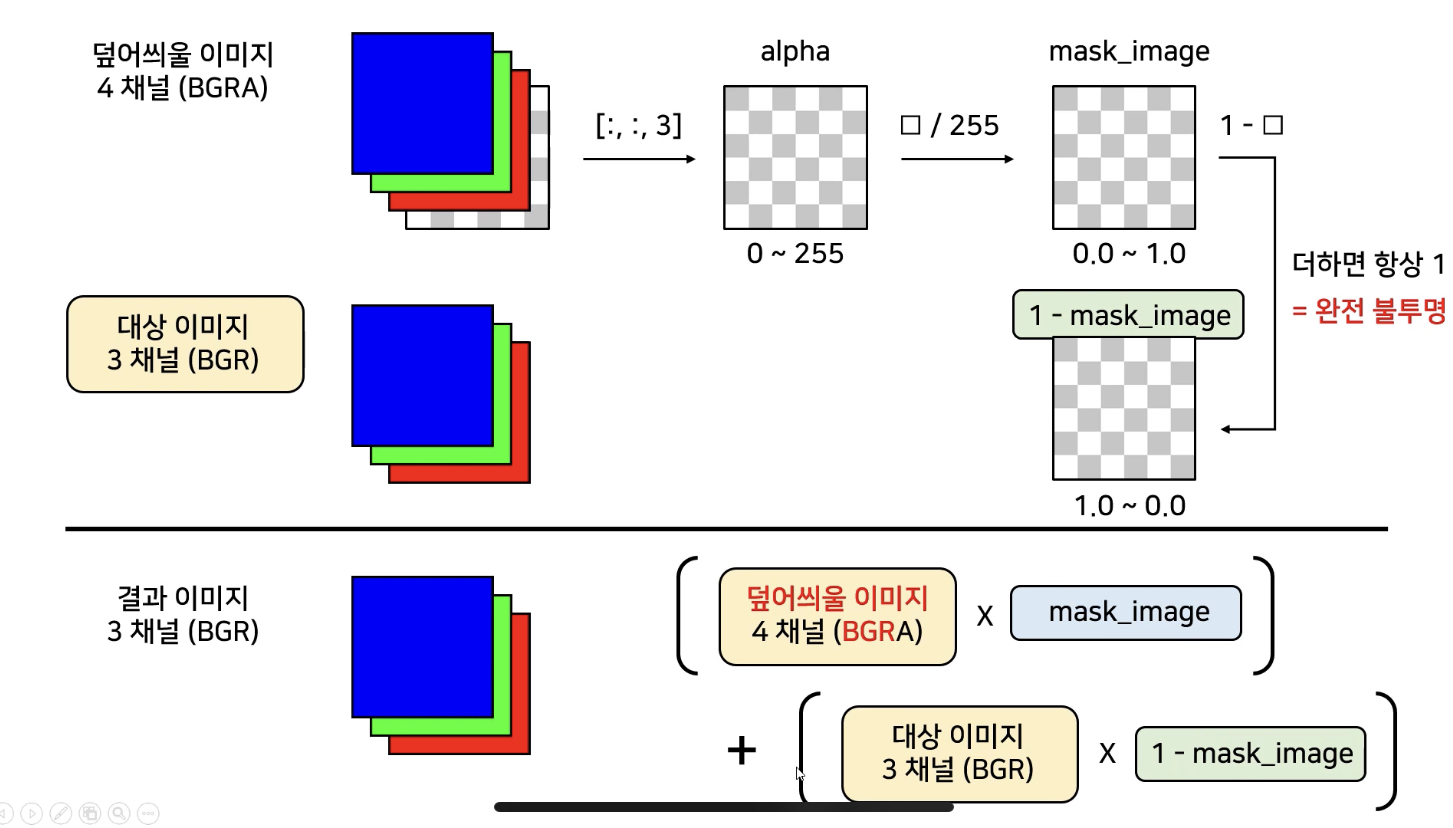

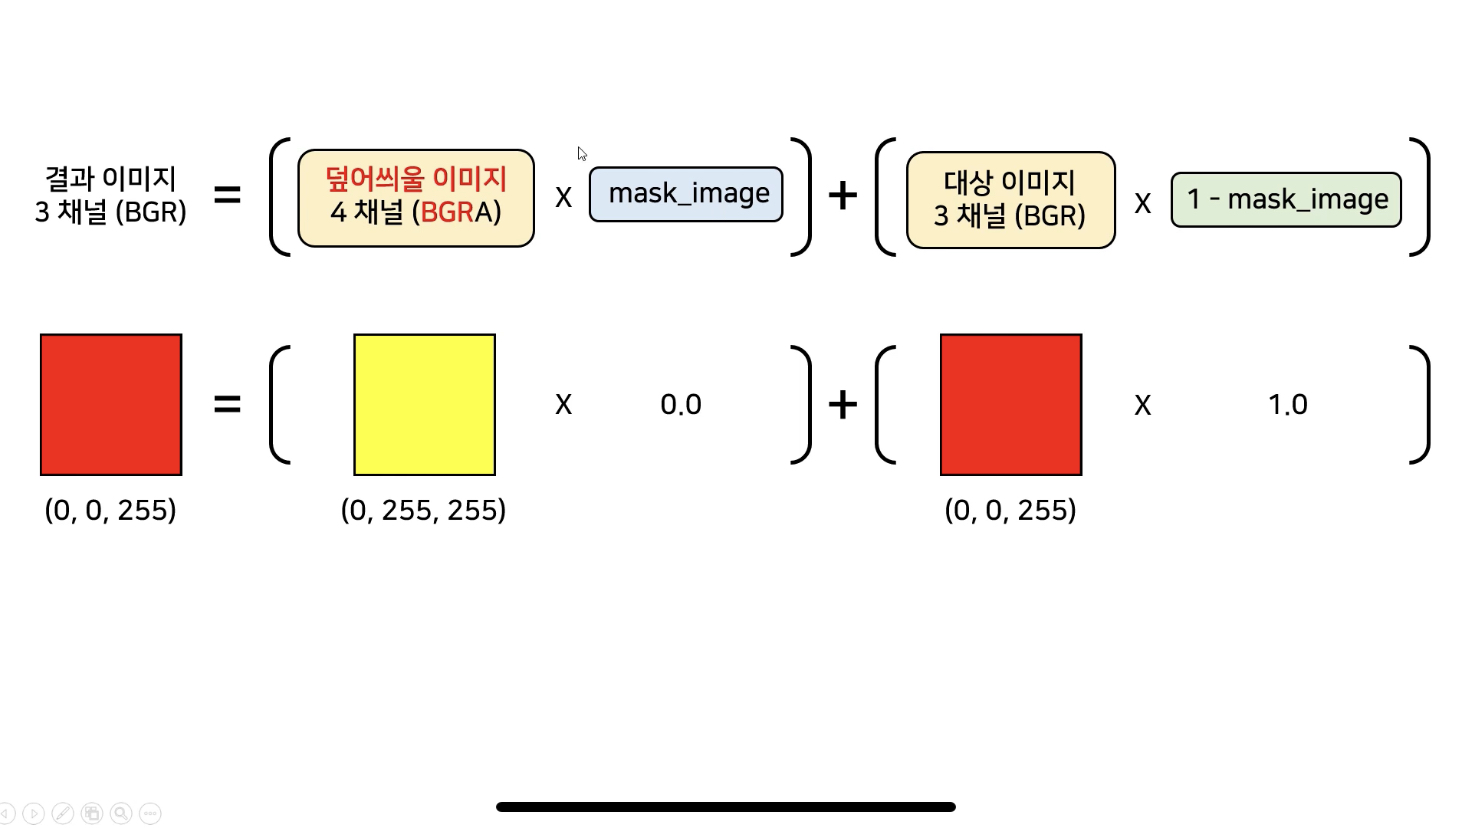

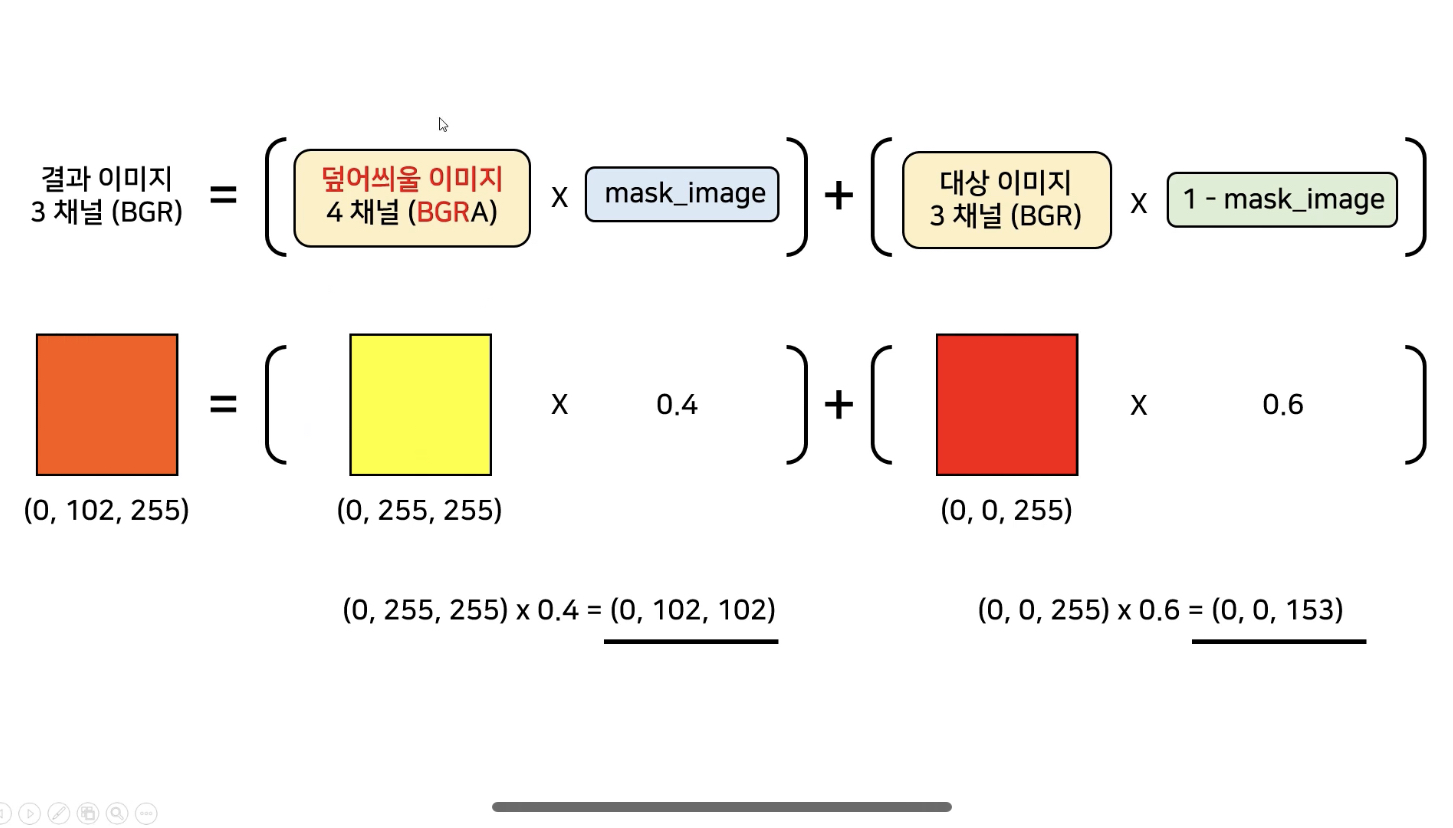

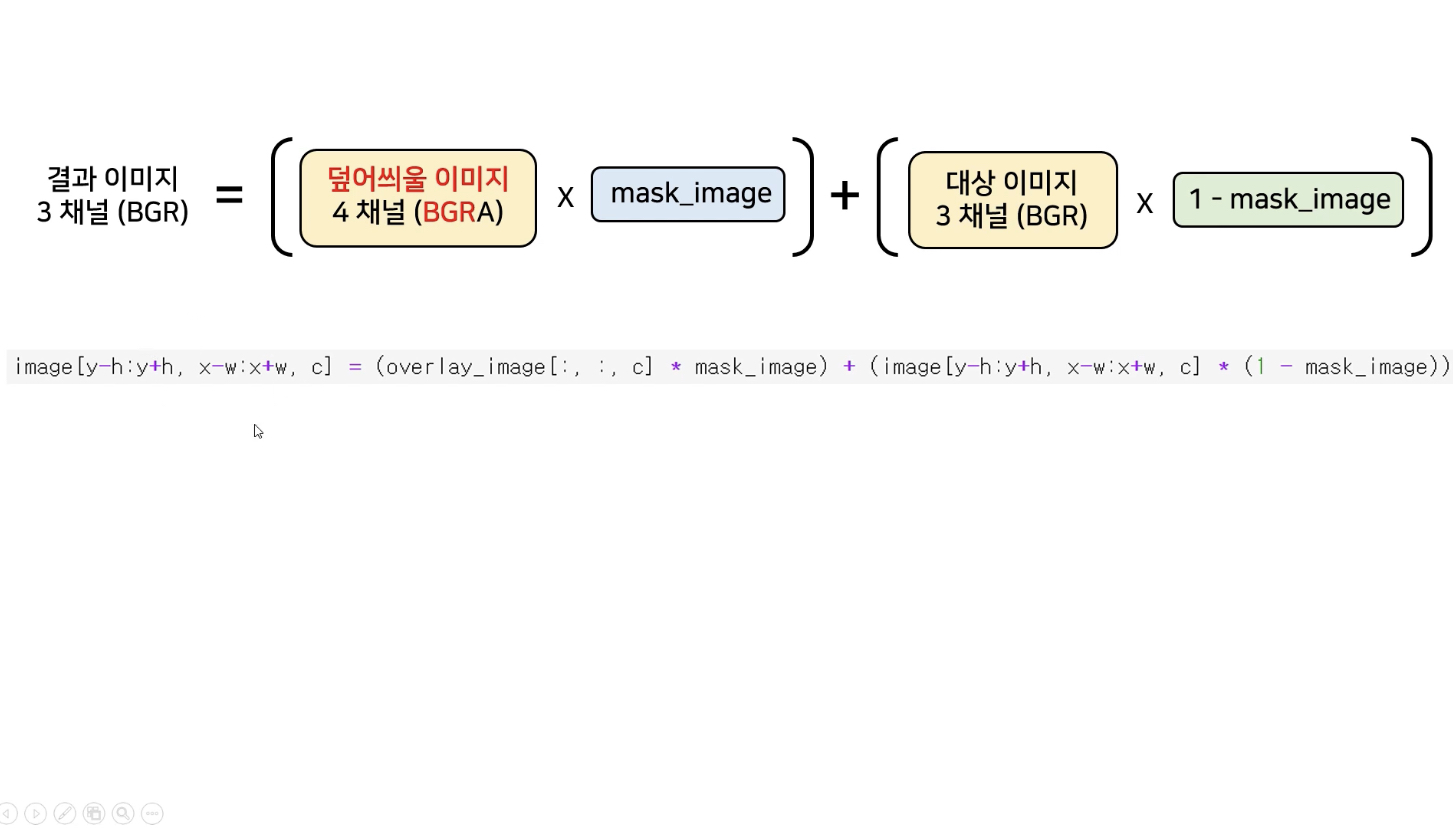

In [8]:
tuple_values = (1, 2) # 튜플을 가지는 변수
li = [*tuple_values] # 변수앞에 *을 붙여서 튜플로 묶인 값을 풀어줄 수 있음
li

[1, 2]